In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy
import sklearn
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('/Users/oreoluwaagbeja/Desktop/UDEMY DATA SCIENCE/11. CLUSTER ANALYSIS/Market Segmentation/Market Segmentation 1/3.12. Example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


#### Data Acquisition

SATISFACTION - self reported. People were asked to rate their shopping experience from 1- 10. It is a discrete variable.
BRAND LOYALTY - measured through the number of purchases for that year and other significant factors.
(There is no widely accepted technique to measure it but there are proxies like churn rate, retention rate and customer lifetime value (CLV) ) ranges from -2 to 2


<function matplotlib.pyplot.show(*args, **kw)>

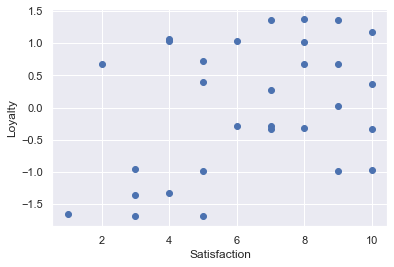

In [5]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show

In [8]:
x= data.copy()
#copying the data into a new variable called x

In [7]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [9]:
#clusters is a duplicate of x and the column cluster spread of the dataframe will contain the cluster
#the column cluster pred of this dataframe will contain the dataframe were a particular observation was predicted to be placed ny the algorithm

The column 'cluster_pred' of 'clusters' will contain the predictions

In [10]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

<function matplotlib.pyplot.show(*args, **kw)>

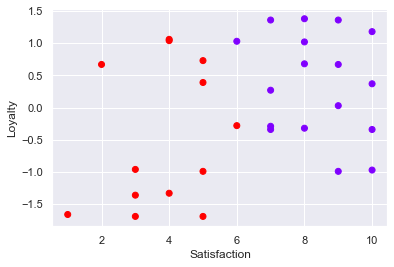

In [13]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c= clusters['cluster_pred'], cmap= 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show

What can be observed is two clusters but not what we have imagined. Looking closely it can be observed that there seems to be a cutoff line of 6 because most likely the algorithm only considered satisfaction as a feature.
This is because the variable wasnt standardized. The satisfaction values are much higher than loyalty and kmeans disregarded loyalty as a feature. Whenever we cluster on the basis of a single feature the result will look like this as if it was cut off by a vertical line.



By standardizing the satisfaction, the variabes will have equal weights

In [14]:
from sklearn import preprocessing

In [25]:
#Scale is a method which scales each variable separately
#In other words it will standardize in respect to itself
x_scaled = preprocessing.scale(x)

In [26]:
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

Since we dont know the no of clusters we'll take advantage of the Elbow Method

## THE ELBOW METHOD

In [29]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.348079410290981,
 4.315662464700004,
 3.7799886162052667]

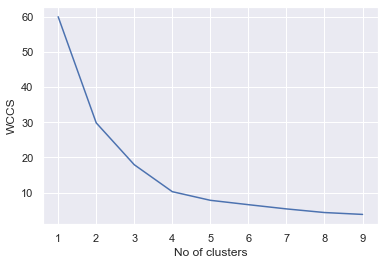

In [30]:
plt.plot(range(1,10), wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCCS')
plt.show()